In [1]:
import numpy as np

In [2]:
A = np.arange(1, 1001)

In [3]:
def F(x): # x = [1 0 0 1], -x+1 = [0 1 1 0]
    return np.abs( np.sum(A[x.astype(bool)]) - np.sum(A[(-x+1).astype(bool)]) )

def Fit(x):
    return 1 / (1 + F(x))

In [4]:
def cross(x, y):
    res = []

    p = Fit(x) / (Fit(x) + Fit(y))

    for i in range(x.shape[0]):
        if np.random.random() < p:
            res.append(x[i])
        else:
            res.append(y[i])

    return np.array(res)

In [14]:
def GA_split(M, K):
    pool = []
    res = [] 
    for _ in range(M): # вектора из 1000 элементов со значениями из {0, 1}
        pool.append(np.random.randint(2, size=1000))
    
    lmb = lambda i : -Fit(i)
    pool.sort(key=lmb)
    res.append([F(pool[0]), Fit(pool[0])])
    print(f'Значение функции - {res[-1][0]}, итерация - {len(res) - 1}')
    
    L = 0 # счетчик для регистрирования ситуаций 'паралича' лидера
    
    while res[-1][0]:
        
        for m in range(M - K, M): # жеская мутация худших - отбраковка и замена на новых
            pool[m] = np.random.randint(2, size=1000)
        
        
        fits = [ Fit(l) for l in pool]
        s = sum(fits)
        p_l = [ l / s for l in fits ]
        
        if L < 10: # проверяем, стоит ли убивать лидера
            for m in range(1, M):
                eta = np.random.choice(a = len(pool), p = p_l) 
                pool[m] = cross(pool[m], pool[eta])
        else:
            for m in range(M):
                eta = np.random.choice(a = len(pool))
                pool[m] = cross(pool[m], pool[eta])
        
        pool.sort(key=lmb)
        res.append([F(pool[0]), Fit(pool[0])])
        print(f'Значение функции - {res[-1][0]}, итерация - {len(res) - 1}')
        
        if res[-2][0] == res[-1][0]: # увеличиваем счетчик, если лидер не изменился, иначе обнуляем
            L += 1
        else:
            L = 0
    
    return res

In [25]:
show = GA_split(500, 100)

Значение функции - 180, итерация - 0
Значение функции - 10, итерация - 1
Значение функции - 4, итерация - 2
Значение функции - 4, итерация - 3
Значение функции - 4, итерация - 4
Значение функции - 4, итерация - 5
Значение функции - 4, итерация - 6
Значение функции - 4, итерация - 7
Значение функции - 4, итерация - 8
Значение функции - 4, итерация - 9
Значение функции - 4, итерация - 10
Значение функции - 4, итерация - 11
Значение функции - 4, итерация - 12
Значение функции - 4, итерация - 13
Значение функции - 4, итерация - 14
Значение функции - 4, итерация - 15
Значение функции - 4, итерация - 16
Значение функции - 4, итерация - 17
Значение функции - 2, итерация - 18
Значение функции - 2, итерация - 19
Значение функции - 2, итерация - 20
Значение функции - 2, итерация - 21
Значение функции - 2, итерация - 22
Значение функции - 2, итерация - 23
Значение функции - 2, итерация - 24
Значение функции - 2, итерация - 25
Значение функции - 2, итерация - 26
Значение функции - 2, итерация - 27

In [26]:
import matplotlib.pyplot as plt
# import tikzplotlib

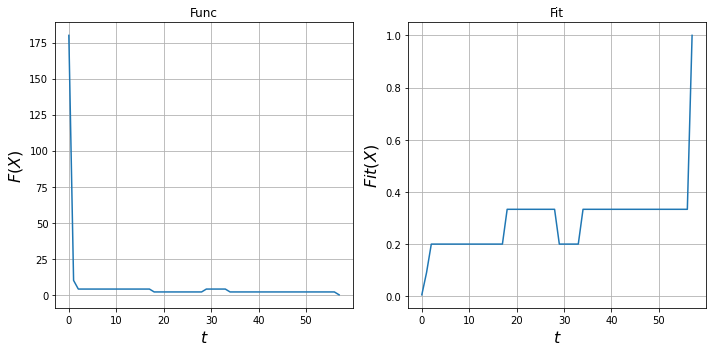

In [30]:
fig, axes = plt.subplots(1, 2, tight_layout = True, figsize=(10, 5))

axes[0].set(title='Func')
axes[1].set(title='Fit')

plt.rcParams['text.usetex'] = True

axes[0].set_ylabel(r'$F(X)$', fontsize = 16)
axes[0].set_xlabel(r'$t$', fontsize = 16)
axes[1].set_ylabel(r'$Fit(X)$', fontsize = 16)
axes[1].set_xlabel(r'$t$', fontsize = 16)

axes[0].plot(np.array(show)[:, 0])
axes[1].plot(np.array(show)[:, 1])

axes[0].grid()
axes[1].grid()

plt.rcParams['text.usetex'] = False

plt.show()
# tikzplotlib.save("GA_split.tex", flavor="context")